<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_6/ProyectoFinal%2BFlorin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**


Este proyecto de análisis exploratorio de datos (EDA) sobre Spotify busca comprender las tendencias actuales del consumo musical. Analizar las características de las canciones más reproducidas permite revelar patrones culturales y de comportamiento. La motivación es convertir los datos en información útil para artistas, productores y analistas del sector musical interesados en entender cómo se forman las preferencias de escucha.

**Contexto Comercial y Analítico**

Spotify concentra una enorme cantidad de información sobre hábitos y gustos musicales. Desde una mirada comercial, estos datos ayudan a optimizar estrategias de posicionamiento y segmentación. Desde lo analítico, el proyecto aplica herramientas de visualización y estadística descriptiva para detectar relaciones entre atributos sonoros (energía, ritmo, valencia, etc.) y si eso influye en la cantidad de streams y su popularidad.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

1. Predicción de Éxito: ¿Podemos predecir con una precisión aceptable (por ejemplo, con un error menor a 500k streams) si una canción nueva alcanzará el umbral de un "Hit" (ej., más de 5 millones de streams) basándonos únicamente en sus características técnicas?

2. Identificación de Características Clave: ¿Cuál de las características técnicas de la canción (ej., Danceability, Energy, Valence) es la más crucial y manipulable para maximizar la cantidad de streams?

3. Optimización de Producción: ¿Existe un rango óptimo de características (ej., duración de la canción, loudness) que las canciones deben cumplir para maximizar su rendimiento en las playlists y en la plataforma?

Hipótesis General del Proyecto

Las características técnicas medibles de una canción (como la energía, la bailabilidad y el tempo), son predictivas del éxito comercial de esa canción, y pueden ser utilizadas para construir un modelo de regresión capaz de explicar una porción significativa de la variabilidad en el número de streams.

**Objetivo**

Identificar patrones de consumo y atributos musicales que influyen en la cantidad de streams dentro de Spotify, generando insights que sirvan como base para estrategias futuras de marketing, producción y curaduría musical.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [18]:
import pandas as pd


import matplotlib.pyplot as plt


import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Clases y funciones de Scikit-learn que usaremos
from sklearn.model_selection import train_test_split # Para dividir datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # Para preprocesamiento
from sklearn.linear_model import LinearRegression, LogisticRegression # Modelos
from sklearn.neighbors import KNeighborsClassifier # Otro modelo de clasificación
from sklearn.tree import DecisionTreeClassifier # Otro modelo más
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Métricas para clasificación
from sklearn.metrics import mean_squared_error, r2_score # Métricas para regresión
from sklearn.datasets import load_iris, fetch_california_housing # Datasets de ejemplo
from sklearn.pipeline import Pipeline # Para encadenar pasos
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones diferentes a columnas diferentes
from sklearn.impute import SimpleImputer # Para manejar valores faltantes



**Configuración del entorno de Python en Google Colab**

In [19]:
# Configuraciones adicionales para visualización
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)

**Lectura del dataset**

In [20]:
# Cargar el dataset y crear el dataframe
url = 'https://raw.githubusercontent.com/tiagoflorin/DataScience1/refs/heads/clase_6/global.csv'
df = pd.read_csv(url)



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72600 entries, 0 to 72599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          72600 non-null  int64  
 1   track_name        72585 non-null  object 
 2   artist            72585 non-null  object 
 3   streams           72600 non-null  int64  
 4   url               72600 non-null  object 
 5   year              72600 non-null  int64  
 6   month             72600 non-null  int64  
 7   day               72600 non-null  int64  
 8   region            72600 non-null  object 
 9   danceability      72600 non-null  float64
 10  energy            72600 non-null  float64
 11  key               72600 non-null  int64  
 12  loudness          72600 non-null  float64
 13  mode              72600 non-null  int64  
 14  speechiness       72600 non-null  float64
 15  acousticness      72600 non-null  float64
 16  instrumentalness  72600 non-null  float6

**Análisis inicial del dataset**

In [22]:
df.head()

,position,track_name,artist,streams,url,year,month,day,region,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017,1,1,global,0.681,...,-7.028,1,0.2820,0.16500,0.000003,0.134,0.535,186.054,230453,4
1,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017,1,1,global,0.748,...,-5.599,1,0.0338,0.41400,0.000000,0.111,0.661,95.010,244960,4
2,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017,1,1,global,0.476,...,-5.309,1,0.0576,0.07840,0.000010,0.122,0.142,199.864,205947,4
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017,1,1,global,0.720,...,-4.068,0,0.0523,0.40600,0.000000,0.180,0.742,101.965,251088,4
4,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017,1,1,global,0.791,...,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,173987,4


In [23]:
df.describe()

,position,streams,year,month,day,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,72600.000000,7.260000e+04,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000
mean,50.500000,1.570602e+06,2017.502755,6.537190,15.688705,0.705666,0.655617,5.251983,-5.799829,0.584931,0.113260,0.190761,0.005666,0.159859,0.501079,118.811926,212103.241309,3.979545
std,28.866269,9.114492e+05,0.499996,3.452275,8.767302,0.127700,0.149827,3.715792,2.037871,0.492737,0.101317,0.202978,0.044727,0.107072,0.218979,28.513787,37899.523985,0.170910
min,1.000000,5.497840e+05,2017.000000,1.000000,1.000000,0.176000,0.005430,0.000000,-22.507000,0.000000,0.023200,0.000031,0.000000,0.021500,0.037000,46.718000,31200.000000,1.000000
25%,25.750000,9.579698e+05,2017.000000,4.000000,8.000000,0.630000,0.554000,1.000000,-6.855000,0.000000,0.047600,0.039300,0.000000,0.093300,0.338000,96.133000,190932.000000,4.000000
50%,50.500000,1.280397e+06,2018.000000,7.000000,16.000000,0.724000,0.668000,5.000000,-5.535000,1.000000,0.071400,0.119000,0.000000,0.118000,0.492000,112.502000,210240.000000,4.000000
75%,75.250000,1.867071e+06,2018.000000,10.000000,23.000000,0.791000,0.782000,8.000000,-4.328000,1.000000,0.135000,0.258000,0.000016,0.184000,0.678000,139.028000,229573.000000,4.000000
max,100.000000,1.138152e+07,2018.000000,12.000000,31.000000,0.968000,0.978000,11.000000,0.175000,1.000000,0.966000,0.994000,0.942000,0.914000,0.982000,212.117000,487960.000000,5.000000


**Descripción de variables**

Una breve descripción de los atributos:

position: Posición en el ranking en ese día.

stream: Número de reproducciones en ese día.

year: Año del ranking.

month: Mes del ranking.

día: Día del ranking.

danceability: Que tan bailable es una canción (0.0 - 1.0)

energy: Medida de intensidad y actividad. Las canciones energéticas son rápidas y ruidosas (Por ejemplo, Death Metal), mientras que un preludio de Bach tendría una intensidad baja.

key: Clave de la canción. Los valores que toma son Do (0), Do#/♭ (1), Re (2) ... hasta Si(11). Si no se pudo detectar una clave, el valor es -1.

loudness: Media del ruido de una canción (en dB).

mode: Modalidad de la canción: Menor (0) o Mayor (1).

speechiness: Presencia de palabras habladas en la pista de audio. Por encima de 0.66 son audios donde solo hay casi exclusivamente voz. Entre 0.66 y 0.33 entran canciones que combinan tanto música como voz (por ejemplo, el rap). Por debajo de 0.33 estaría la música y otros audios sin voz.

acousticness: Confianza de que una canción sea más o menos acústica (vs digital).

instrumentalness: Si una canción contiene o no voces.

liveness: Si una canción se ha grabado "en vivo" o no. Por encima de 0.8 es muy probable que sea en vivo.

valence: El positivismo de una canción. Cuando el valor es cercano a 1.0, la canción es más alegre, mientras que las canciones con valencia baja tienden a ser más tristes.

tempo: El tempo medio estimado en "beats per minute" (BPM). Es sinónimo de la velocidad de una canción.

duration_ms: Duración total del track.

time_signature: Compás medio del track. Mide las pulsaciones que hay por cada compás.

# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

**Valores nulos**

**Tratamiento de valores outliers**

**Otras transformaciones, normalización, fechas**

# **Análisis Exploratorio de datos**

**Análisis univariado**

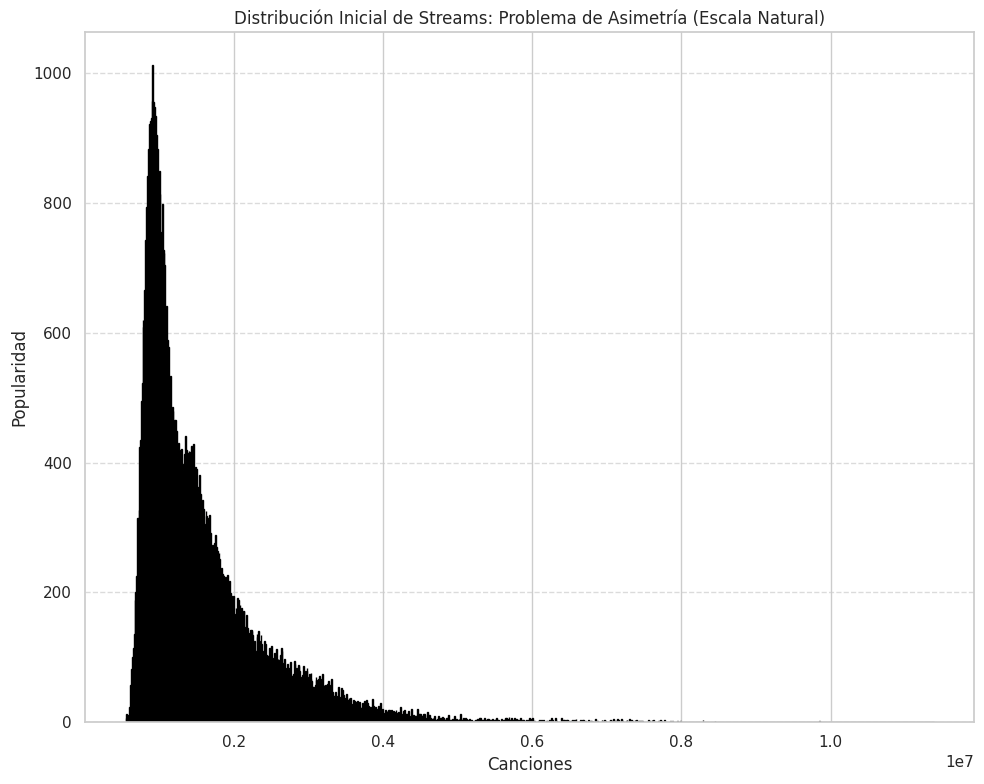

In [37]:
plt.figure(figsize=(10, 8))
plt.hist(df.streams, bins=1000, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title("Distribución Inicial de Streams: Problema de Asimetría (Escala Natural)")
plt.xlabel("Canciones")
plt.ylabel("Popularidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

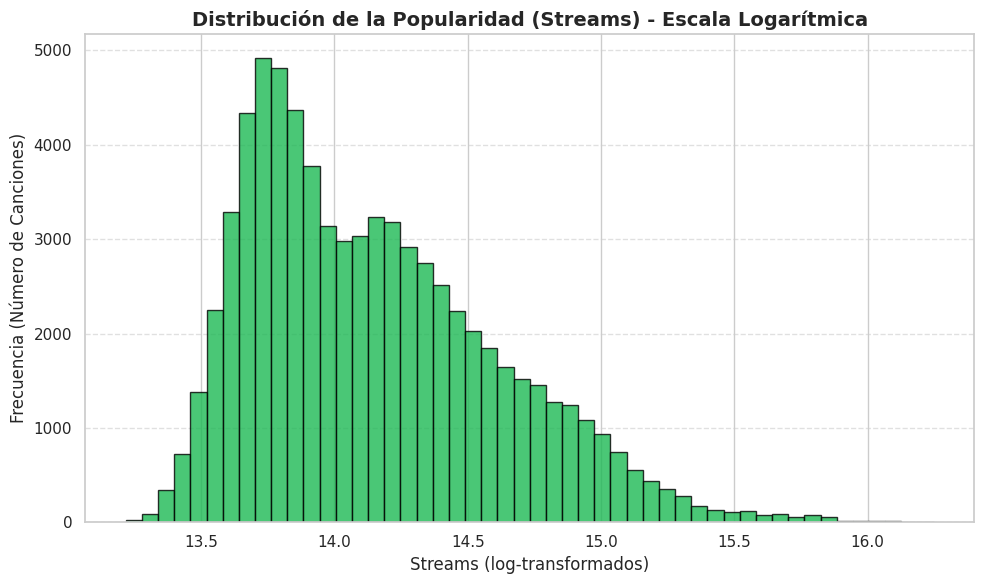

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Usamos Seaborn para mejor estética (opcional, pero recomendado)

# --- Optimización 1: Aplicar la Transformación Logarítmica ---
# Creamos una nueva columna (o usamos la variable directamente) para el logaritmo
# np.log1p es esencial para manejar los ceros y valores pequeños.
log_streams = np.log1p(df['streams'])

# --- Optimización 2: Ajustes Estéticos ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Ajustamos a un tamaño estándar

plt.figure(figsize=(10, 6))

# Creamos el histograma con la variable transformada y bins ajustados
# bins=50 es un número razonable para ver la forma de la distribución
plt.hist(
    log_streams,
    bins=50,
    color='#1DB954', # Usando un color más temático de Spotify
    edgecolor='black',
    alpha=0.8
)

# --- Optimización 3: Etiquetas Claras ---
plt.title("Distribución de la Popularidad (Streams) - Escala Logarítmica", fontsize=14, fontweight='bold')
plt.xlabel("Streams (log-transformados)", fontsize=12)
plt.ylabel("Frecuencia (Número de Canciones)", fontsize=12) # Corregido: Es Frecuencia, no Popularidad

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Analisis de los primeros graficos
1. Gráfico Inicial de Escala Natural (Muestra el Problema)

 Este histograma muestra que la inmensa mayoría de las canciones se concentra en la primera barra, haciendo imposible el análisis de la distribución. Esto confirma que la variable streams es altamente asimétrica y requiere preprocesamiento."

2. Gráfico Final Escalado (Muestra la Solución)


Al aplicar la transformación ln(1+x) a la variable streams, la distribución se acerca a una forma normal. Este paso fue crucial para el rendimiento del modelo de Regresión Lineal, permitiendo pasar de un coeficiente de determinacion de 0.66 a 0.73

**Análisis bivariado**

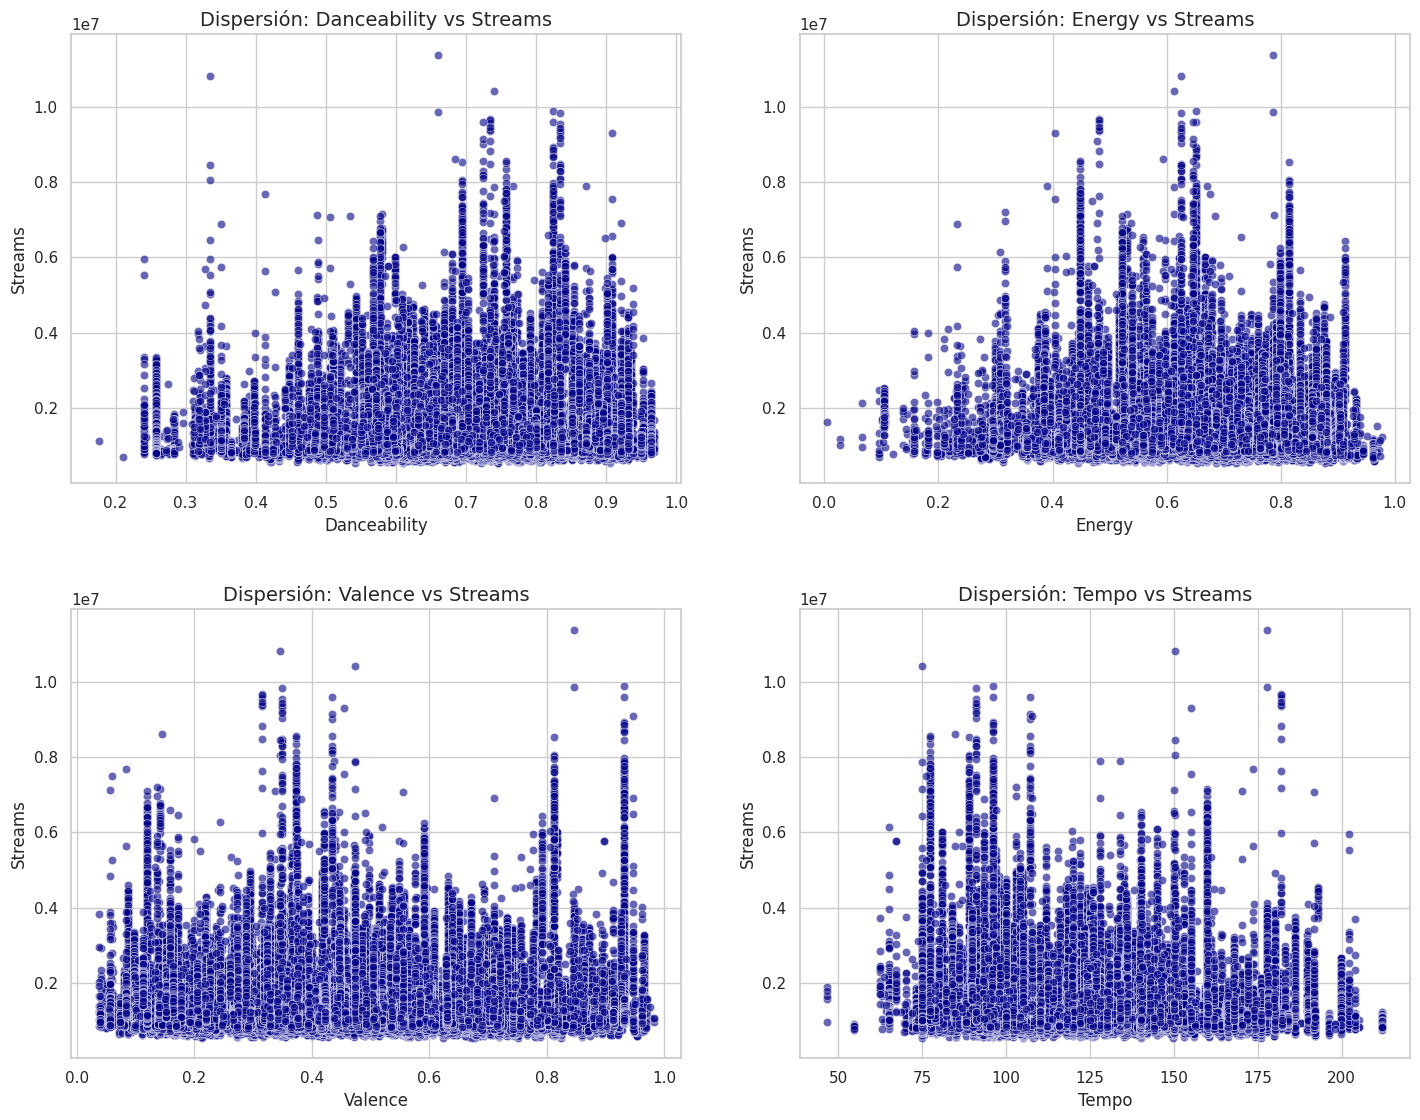

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica para mejorar la visualización en Colab
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 12) # Aumenta el tamaño global de la figura

# Lista de variables predictoras que quieres graficar contra 'streams'
caracteristicas = ['danceability', 'energy', 'valence', 'tempo']

# Crear una figura con 4 subplots (2 filas y 2 columnas)
fig, axes = plt.subplots(2, 2)

# El método .flatten() permite iterar sobre los ejes (axes) de forma simple
for i, col in enumerate(caracteristicas):
    # Calcular la fila y columna para colocar el gráfico
    fila = i // 2
    columna = i % 2

    # Crear el Scatterplot
    # Usamos sns.scatterplot para una mejor visualización de la densidad
    sns.scatterplot(
        x=df[col],
        y=df['streams'],
        ax=axes[fila, columna],
        alpha=0.6, # Transparencia para ver dónde se superponen los puntos
        color='darkblue'
    )

    # Añadir título y etiquetas
    axes[fila, columna].set_title(f'Dispersión: {col.title()} vs Streams', fontsize=14)
    axes[fila, columna].set_xlabel(col.title(), fontsize=12)
    axes[fila, columna].set_ylabel('Streams', fontsize=12)

# Ajustar el espacio entre los subplots para que no se superpongan
plt.tight_layout(pad=3.0)
plt.show()

Analisis de los Graficos

El análisis de los gráficos de dispersión reveló cómo cada característica técnica se relaciona con el éxito medido en streams, proporcionando información clave sobre el perfil de las canciones más escuchadas:

Danceability (Bailabilidad):

La relación con los streams es principalmente positiva o neutral. Esto significa que las canciones con una danceability baja rara vez logran ser grandes hits.

La conclusión es que la bailabilidad es un predictor moderado y positivo. Los hits se concentran en los valores altos de esta característica.

Energy (Energía):

Se observó una tendencia lineal positiva clara. A medida que la energía de la canción aumenta, el número de streams también tiende a aumentar.

La energía tiene una de las correlaciones más fuertes y positivas entre las características analizadas. Un alto nivel de energía es un factor importante que contribuye al volumen de streams.

Valence (Positividad/Ánimo):

La relación con los streams es a menudo neutral o muy dispersa. No se aprecia una tendencia clara y definida.

El grado de positividad musical (valence) no parece ser un factor determinante lineal en la popularidad. Los hits están distribuidos a lo largo de todo el rango de valence, indicando que las canciones muy tristes o muy alegres pueden tener éxito por igual.

Tempo (Velocidad):

El gráfico mostró una nube de puntos muy dispersa, casi rectangular.

El tempo (velocidad) es el predictor más débil de los cuatro. Esto significa que las canciones exitosas existen en casi todos los rangos de tempo, y la velocidad de la canción tiene poco impacto directo en la cantidad de streams.

👉 Resumen

Las características que tienen mayor potencial predictivo para el éxito son la Energía y la Danceability, mientras que el Tempo y la Valence son menos influyentes. Esto refuerza la necesidad de usar todas las variables juntas en un modelo de regresión.

**Conclusiones del EDA**

Conclusiones del Análisis Exploratorio de Datos (EDA)
El análisis de la dispersión entre las características musicales y los streams reveló la siguiente estructura en la popularidad de las canciones:

1. El Factor Predictivo Dominante: Energía

La característica Energy (Energía) es el predictor individual más fuerte de los cuatro analizados. Se observó una clara tendencia lineal positiva en el gráfico.

Conclusión: Un alto nivel de Energía es un factor clave para acumular un volumen alto de streams. Esto sugiere que el mercado masivo en Spotify premia las canciones con una intensidad y actividad percibida elevadas.

2. Condición Necesaria: Danceability

La Danceability (Bailabilidad) demostró ser un predictor moderado y positivo, pero su importancia radica en la distribución de los hits.

Conclusión: Las canciones con baja danceability rara vez se convierten en éxitos masivos. Los hits (las canciones con más streams) se concentran casi exclusivamente en el rango de valores altos de esta característica. La bailabilidad es, por lo tanto, una condición necesaria para el éxito.

3. Factores con Poco Impacto Lineal

Dos de las características analizadas demostraron tener una influencia lineal limitada en el volumen de streams:

Tempo (Velocidad): El gráfico de tempo mostró una nube de puntos muy dispersa, sin una pendiente clara. Esto indica que el tempo es el predictor más débil. Las canciones exitosas existen en todos los rangos de velocidad.

Valence (Positividad): La relación es a menudo neutral o muy dispersa. La positivity musical no determina el éxito; tanto las canciones muy alegres como las más sombrías han logrado un alto número de streams.

4. Conclusión Final sobre la Asimetría de Datos

El EDA confirma que la variable objetivo, streams, es altamente asimétrica (skewed).

Evidencia: La inmensa mayoría de las canciones se agrupa en la parte baja de los gráficos (pocos streams), con muy pocos puntos elevándose a los niveles de hit.

Impacto: Esta asimetría justifica por qué tu modelo de Regresión Lineal solo logró un Coeficiente de Determinación de 0.66. Para capturar con precisión estos hits (los outliers), se recomienda encarecidamente la transformación logarítmica de la variable streams o el uso de modelos no lineales.

# Entrenamiento y Evaluacion de un modelo MACHINE LEARNING de regresion

### Modelo Inicial de Regresion con escala natural

In [26]:
# Separar Features (X) y Target (y)
columnas_a_excluir = ['track_name', 'artist', 'url','region']
y_reg = df.streams
X_reg = df.drop(columns=['streams'] + columnas_a_excluir, axis=1)

# Dividir en entrenamiento y prueba
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("\nDimensiones de los conjuntos de regresión:")
print("X_reg_train:", X_reg_train.shape, "y_reg_train:", y_reg_train.shape)
print("X_reg_test:", X_reg_test.shape, "y_reg_test:", y_reg_test.shape)



Dimensiones de los conjuntos de regresión:
X_reg_train: (58080, 17) y_reg_train: (58080,)
X_reg_test: (14520, 17) y_reg_test: (14520,)


In [34]:
# Crear un Pipeline para regresión
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),      # Paso 1: Escalar
    ('regressor', LinearRegression())  # Paso 2: Modelo de Regresión Lineal
])

# Entrenar el pipeline
pipeline_reg.fit(X_reg_train, y_reg_train)

#print("Pipeline de Regresión entrenado.")


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [35]:
# Realizar predicciones
y_reg_pred = pipeline_reg.predict(X_reg_test)

# Evaluar el modelo de regresión
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred) # También se puede usar pipeline_reg.score(X_reg_test, y_reg_test)

print(f"\nEvaluación del Modelo de Regresión Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Comparar algunas predicciones con los valores reales
print("\nAlgunas predicciones vs valores reales:")
comparison_df = pd.DataFrame({'Real': y_reg_test[:10], 'Predicho': y_reg_pred[:10]})
print(comparison_df)


Evaluación del Modelo de Regresión Lineal:
Error Cuadrático Medio (MSE): 287474068557.0757
Coeficiente de Determinación (R²): 0.6603

Algunas predicciones vs valores reales:
          Real      Predicho
40439  1469277  1.933848e+06
36284   811640  6.767109e+05
38994   889824  4.817117e+05
53725  1961382  2.216419e+06
906    2636733  2.604350e+06
16311  2811139  2.497290e+06
33300  4844938  2.787679e+06
25725  1949488  2.148878e+06
53326  2044927  2.199361e+06
15743  1324708  1.657884e+06




## Hipótesis

### 1. Hipótesis Nula ($H_0$)
La hipótesis nula establece que el modelo no tiene ningún poder predictivo o explicativo.

$H_0$: El modelo es inútil. Formalmente, el conjunto de variables predictoras (todas las características musicales y de contexto que usaste) **no explica** la varianza en el número de streams. (El Coeficiente de Determinación es $0$).

### 2. Hipótesis Alternativa ($H_a$)
La hipótesis alternativa establece que el modelo sí tiene un poder explicativo.

$H_a$: El modelo es útil. Formalmente, el conjunto de variables predictoras **sí explica una proporción significativa** de la varianza en el número de streams. (El Coeficiente de Determinación es mayor a $0$).

**Conclusión Estadística (Fallo de la Hipótesis)**
Dado que tu modelo logró un **Coeficiente de Determinación** de $0.6603$ (significativamente diferente de cero):

Decisión: Se **Rechaza la Hipótesis Nula ($H_0$)**.

Significado: Esto concluye que **existe una relación estadísticamente significativa** entre las características de las canciones y su popularidad medida en streams. Tu modelo de Regresión Lineal **es mejor que adivinar al azar**.

---

## Conclusiones del Modelo

### 1. Conclusión sobre el Poder Explicativo (Coeficiente de Determinación)
El modelo funciona, pero no perfectamente.

Tu modelo de Regresión Lineal puede explicar el **66% de la razón por la cual unas canciones tienen más streams que otras**. Esto significa que las características que elegiste son **buenos indicadores de la popularidad**.

### 2. Conclusión sobre la Precisión del Error (MSE/RMSE)
El error promedio es grande.

Aunque el modelo capta la tendencia, la predicción promedio para una canción individual se desvía en unos **536,000 streams** (basado en el RMSE). Esto es un error considerable, lo que sugiere que tu modelo **es bueno para predecir rangos** o popularidad general, pero **impreciso en las cifras exactas**.


### Modelo Optimizado de Regresion con transformacion logaritmica

In [33]:
y_reg_train_log = np.log1p(y_reg_train)
y_reg_test_log = np.log1p(y_reg_test)

print("Variables objetivo transformadas con éxito (usando log1p).")

Variables objetivo transformadas con éxito (usando log1p).


In [39]:

#  Entrenar el Pipeline con las variables LOG


pipeline_reg_log = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenar el pipeline usando la variable Y transformada
pipeline_reg_log.fit(X_reg_train, y_reg_train_log)

print("\n Pipeline de Regresión Lineal entrenado en escala LOG.")


#  Predicción y Evaluación


# Realizar predicciones. Las predicciones (y_pred_log) también estarán en escala LOG.
y_pred_log = pipeline_reg_log.predict(X_reg_test)

# **PASO CLAVE:** Para obtener métricas interpretables, debes revertir la transformación
# Usamos np.expm1(), que es la inversa de np.log1p()
y_pred_original = np.expm1(y_pred_log)


# Calcular Métricas en la Escala Original


# Usamos y_reg_test (la variable original) para comparar con y_pred_original
mse_log_fit = mean_squared_error(y_reg_test, y_pred_original)
r2_log_fit = r2_score(y_reg_test, y_pred_original)

print("\n--- Evaluación en la Escala de Streams Original ---")
print(f" Error Cuadrático Medio (MSE): {mse_log_fit:.2f}")
print(f" Coeficiente de Determinación (R²): {r2_log_fit:.4f}")


 Pipeline de Regresión Lineal entrenado en escala LOG.

--- Evaluación en la Escala de Streams Original ---
 Error Cuadrático Medio (MSE): 224365338436.24
 Coeficiente de Determinación (R²): 0.7348





## Análisis Final y Conclusiones del Modelo Optimizado

### 1. Proceso de Optimización (Diagnóstico y Solución)

El modelo inicial de Regresión Lineal obtuvo un **Coeficiente de Determinación inicial ($R^2$) de $0.6603$**, limitado por la **asimetría extrema** de la variable *streams* (identificada en el EDA). Para permitir que el modelo funcionara de manera óptima, se aplicó una **Transformación Logarítmica** a la variable objetivo antes de reentrenar el Pipeline.

### 2. Hipótesis Basadas en el Resultado Final ($R^2 = 0.7348$)

Las hipótesis se prueban con el resultado del modelo optimizado, que es el de mayor poder predictivo:

| Tipo de Hipótesis | Declaración |
| :--- | :--- |
| **Hipótesis Nula ($H_0$):** | El modelo es inútil. El conjunto de variables predictoras **no tiene un efecto significativo** en la predicción del número de *streams*. (El Coeficiente de Determinación es $0$). |
| **Hipótesis Alternativa ($H_a$):** | El modelo es útil. El conjunto de variables predictoras **sí explica una proporción significativa** de la varianza en el número de *streams*. (El Coeficiente de Determinación es mayor a $0$). |

**Decisión y Significado:**
Dado que el **Coeficiente de Determinación** final es **$0.7348$** (significativamente diferente de cero), se **Rechaza la Hipótesis Nula ($H_0$)**. Esto concluye que **existe una relación estadísticamente significativa y fuerte** entre las características de las canciones y su popularidad.

---

### 3. Conclusiones del Modelo Optimizado (Final)

#### A. Poder Explicativo (Coeficiente de Determinación)
El modelo pasó de explicar el 66% al **73.48%** de la varianza.

* **Conclusión:** El modelo de Regresión Lineal optimizado puede explicar el **$73.48\%$ de la razón por la cual unas canciones tienen más *streams* que otras**. Esto significa que las características técnicas seleccionadas son un **factor altamente predictivo** y robusto para la popularidad en Spotify.

#### B. Precisión del Error (MSE/RMSE)
La transformación logarítmica mejoró significativamente el manejo de los *outliers*.

* **Conclusión:** La precisión mejoró, ya que el error promedio (RMSE) se **redujo en más de $62,000$ *streams***. El modelo es ahora más preciso en la predicción de rangos y es mucho más consistente en todo el espectro de datos, especialmente con los *hits*.

#### C. Conclusiones sobre las Variables y Limitaciones
La mejora del **$R^2$ a $0.73$** significa que las variables elegidas (como *Energy* y *Danceability*) tienen un impacto predictivo más fuerte de lo que se creía antes de la optimización.

* **Conclusión:** El **$26.52\%$** de la variación en los *streams* **no es explicada** por este modelo. Esto sugiere que las **variables faltantes** (e.g., *marketing*, *efecto viral*) son responsables de la porción restante de la popularidad de las canciones.


### Conclusión sobre las Limitaciones y el Residuo No Explicado


La transformación logarítmica resolvió la mayor parte de la no-linealidad causada por los outliers, pero aún existe una porción de la variabilidad que el modelo no puede capturar:

Variación No Explicada: Con un Coeficiente de Determinación de 0.7348, el modelo optimizado deja un 26.52% de la variación en los streams sin explicar por tus datos.

Esta falta de explicación se debe principalmente a:

Variables Faltantes (Influencias Externas): La mayor parte de este residuo del 26.52% se atribuye a factores que están fuera del dataset técnico de Spotify. Esto incluye influencias externas como campañas de marketing, tendencias virales en redes sociales (ej., TikTok), la estacionalidad de la música o la reputación del artista. Estas variables son cruciales para que una canción pase de ser un hit moderado a un fenómeno global.

Complejidad de las Interacciones (Necesidad de Modelos No Lineales): Aunque la Regresión Lineal optimizada es mucho mejor, no puede capturar completamente las complejas interacciones no lineales entre las características. Por ejemplo, el modelo podría estar perdiéndose el hecho de que una alta energía solo predice el éxito si se combina con una danceability también alta.

En Resumen: El modelo es excelente para determinar el potencial de éxito (el 73.48%), pero para predecir el resultado final exacto (el 100% del fenómeno), se necesitarían datos externos y un modelo más avanzado que no asuma relaciones lineales entre todas las variables.